<a href="https://colab.research.google.com/github/1ncl3m3nt3/Comision-75830-Clemente-Marquez/blob/main/ProyectoDS3_EntregaFinal_Marquez_Clemente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final - Entrega Final**

*   **Curso:** Data Science III
*   **Comisión:** 75830
*   **Autor:** Clemente Elías Márquez Alvíarez
*   **Tema:** Análisis de Sentimiento de Tweets de Juegos y Apps
*   **Dataset:** games.csv

## **Presentación del proyecto**

Análisis de Sentimiento de Tweets de Juegos y Apps

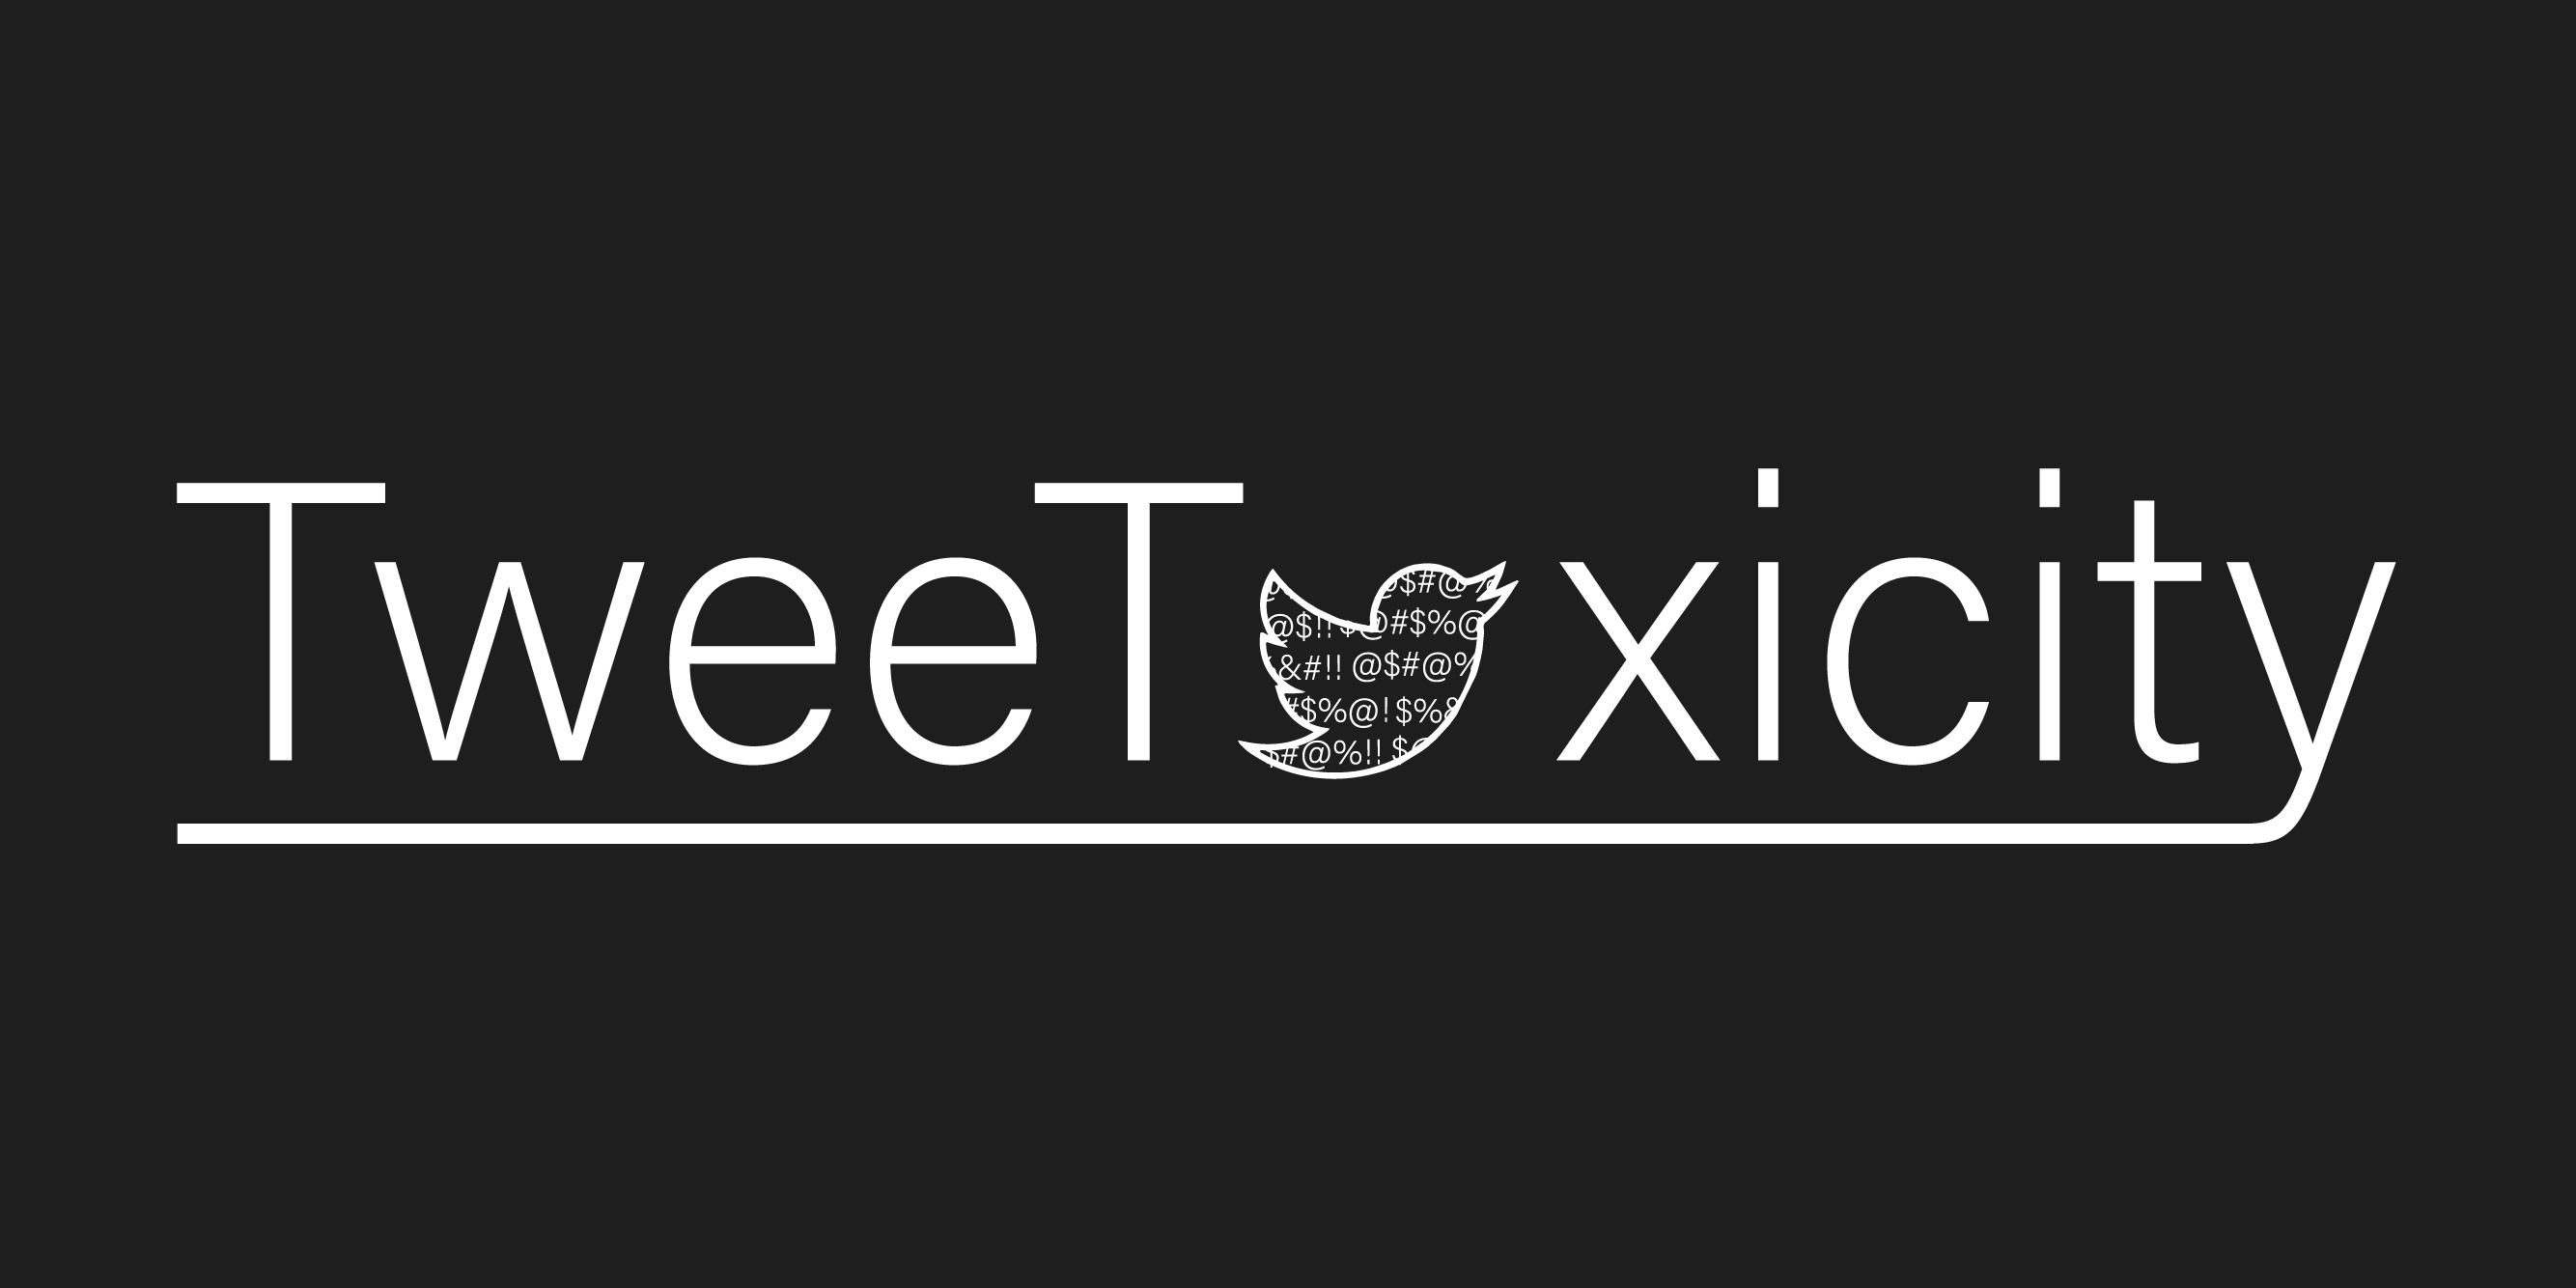

### **Motivación y Audiencia**

La principal motivación detrás de este proyecto es el aprendizaje de NLP y Deep Learning, a través de la práctica y ejecución de las diversas técnicas la cuales permiten el entendimiento de esta poderosa herramienta.  

Hoy en día tenemos que entender al lenguaje como un activo de datos fundamental, el cual es altamente explotable, el cual contiene una valiosa cantidad de información que puede utilizarse para automatizar tareas complejas y crear aplicaciones innovadoras como hemos podido observar en estos últimos años.

En este caso vamos a desarrollar un modelo de análisis de sentimiento que nos permita comprender las opiniones y emociones expresadas en el texto, y se encuentra dirigido a todas aquellas personas que buscan ingresar o que quieran aumentar sus conocimientos en el campo de la ciencia de datos, específicamente en los campos de  NLP y Deep Learning.

### **Contexto Analitico y Dataset**

El dataset seleccionado contiene 74.681 tweets, cada una de las cuales representa una opinión, estos se dividen en 4 columnas con variables, entre las que tenemos el ID del Tweet, la entidad a la que está dirigida el tweet, el contenido del tweet y la etiqueta de clasificación del sentimiento.
Con esta información se busca poder desarrollar un modelo analítico del sentimiento de cualquier tweet cargado en la red social,


### **Fuente**

https://www.kaggle.com/datasets

### **Objetivo**

El objetivo del proyecto es desarrollar un modelo de data science que pueda predecir el sentimiento del tweet basándose en el análisis e interpretación detallada del texto basándose en diversas técnicas de NPL.  Para lograr esto, usaremos diversas librerías de Python y modelos con Redes Neurales, para poder comparar la efectividad de cada uno de ellos e inclinarnos por el que genere los mejores resultados en la interpretación del sentimiento de los tweets.

## **Lectura de datos**

### **Librerías necesarias para el análisis de datos**

In [1]:
# Importar librerias
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Escoger el tipo de tema para los gráficos
sns.set_theme(style="whitegrid")

### **Lectura del dataset**

In [2]:
# Carga Dataset
url = "https://raw.githubusercontent.com/1ncl3m3nt3/Comision-75830-Clemente-Marquez/refs/heads/main/Datasets/games.csv"
dataset = pd.read_csv(url)
dataset

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


### **Análisis inicial del dataset**

In [3]:
# Informacion de Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


Diccionarios de las columnas
- Tweet ID: número de identificación del tweet.
- Entity: juego o apps que recibe el review.      
- Sentiment: sentimiento del tweet (positivo, negativo o neutral)
- Tweet Content: contenido del tweet.


In [4]:
# Tamaño del dataset KB
dataset.size

298728

In [5]:
# Forma del dataset
dataset.shape

(74682, 4)

In [6]:
# Descripción de las variables
dataset[['Entity', 'Sentiment']].describe().T

,count,unique,top,freq
Entity,74682,32,Microsoft,2400
Sentiment,74682,4,Negative,22542


## **Data Wrangling: Limpieza y transformación de datos**

### **Transformaciones de variables y/o valores**

In [7]:
# Chequeo de los valores únicos
for col in dataset.columns:
    print(f'Categorías en {col} son :\n {dataset[col].sort_values().unique()}\n')

Categorías en Tweet ID son :
 [    1     2     3 ... 13198 13199 13200]

Categorías en Entity son :
 ['Amazon' 'ApexLegends' 'AssassinsCreed' 'Battlefield' 'Borderlands'
 'CS-GO' 'CallOfDuty' 'CallOfDutyBlackopsColdWar' 'Cyberpunk2077' 'Dota2'
 'FIFA' 'Facebook' 'Fortnite' 'Google' 'GrandTheftAuto(GTA)' 'Hearthstone'
 'HomeDepot' 'LeagueOfLegends' 'MaddenNFL' 'Microsoft' 'NBA2K' 'Nvidia'
 'Overwatch' 'PlayStation5(PS5)' 'PlayerUnknownsBattlegrounds(PUBG)'
 'RedDeadRedemption(RDR)' 'TomClancysGhostRecon' 'TomClancysRainbowSix'
 'Verizon' 'WorldOfCraft' 'Xbox(Xseries)' 'johnson&johnson']

Categorías en Sentiment son :
 ['Irrelevant' 'Negative' 'Neutral' 'Positive']

Categorías en Tweet Content son :
 [' ' ' .  ' ' .   ' ...
 '🧻 at Home Depot on Hanley. . . I remember when I was excited to announce shows and now I’m excited to share where TP has been located.  It’s amazing what can change in a month. . 🧻'
 '🧻 at Home Depot on Hanley... I remember when I really excited for announce shows _

*Examinamos el dataset para ver los valores unicos de las variables e identificar si es necesario aplicar algunos cambios o hacer alguna correción.*

In [8]:
# Convertir las columnas Entity y Tweet Content a minúsculas
dataset['Entity'] = dataset['Entity'].str.lower()
dataset['Tweet Content'] = dataset['Tweet Content'].str.lower()
dataset

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,borderlands,Positive,i am coming to the borders and i will kill you...
2,2401,borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,nvidia,Positive,just realized that the windows partition of my...
74678,9200,nvidia,Positive,just realized that my mac window partition is ...
74679,9200,nvidia,Positive,just realized the windows partition of my mac ...
74680,9200,nvidia,Positive,just realized between the windows partition of...


In [9]:
# Corrección de la variable Sentiment reemplazo por etiquetas numericas
dataset['Sentiment Label'] = dataset['Sentiment'].replace({
    'Negative': -1,
    'Positive': 1,
    'Neutral': 0,
    'Irrelevant': 0
})

# Convertir la variable Sentiment a int64
dataset['Sentiment Label'] = dataset['Sentiment Label'].astype('int64')
dataset

<ipython-input-9-3652e49b57a9>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Sentiment Label'] = dataset['Sentiment'].replace({


,Tweet ID,Entity,Sentiment,Tweet Content,Sentiment Label
0,2401,borderlands,Positive,im getting on borderlands and i will murder yo...,1
1,2401,borderlands,Positive,i am coming to the borders and i will kill you...,1
2,2401,borderlands,Positive,im getting on borderlands and i will kill you ...,1
3,2401,borderlands,Positive,im coming on borderlands and i will murder you...,1
4,2401,borderlands,Positive,im getting on borderlands 2 and i will murder ...,1
...,...,...,...,...,...
74677,9200,nvidia,Positive,just realized that the windows partition of my...,1
74678,9200,nvidia,Positive,just realized that my mac window partition is ...,1
74679,9200,nvidia,Positive,just realized the windows partition of my mac ...,1
74680,9200,nvidia,Positive,just realized between the windows partition of...,1


*La variable Sentiment tienes palabras las cuales vamos a reemplazar con los valores de -1, 0 y 1 en una nueva variable entero llamada Sentiment Label, para identificar el sentimiento negativo, neutral, irrelevante y positivo.*


In [10]:
# Conteo de la variable Tweet Content
dataset['Tweet Lenght'] = dataset['Tweet Content'].str.len()
dataset['Tweet Lenght'] = dataset['Tweet Lenght'].fillna(0).astype('int64')
dataset['Tweet Lenght']

,Tweet Lenght
0,53
1,51
2,50
3,51
4,57
...,...
74677,128
74678,117
74679,125
74680,159


*Agregamos la variable Tweet Lenght para tener la informacion de la cantidad de caracteres del contenido de los tweets.*

In [11]:
# Información de Dataset con los ajustes realizados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet ID         74682 non-null  int64 
 1   Entity           74682 non-null  object
 2   Sentiment        74682 non-null  object
 3   Tweet Content    73996 non-null  object
 4   Sentiment Label  74682 non-null  int64 
 5   Tweet Lenght     74682 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.4+ MB


Diccionarios de las columnas nuevas
- Sentiment Label: Se reemplazan las palabras de sentimiento por valores de -1, 0 y 1.
- Tweet Lenght: cantidad de caracteres de los tweets.

## **EDA: Análisis Exploratorio de datos**

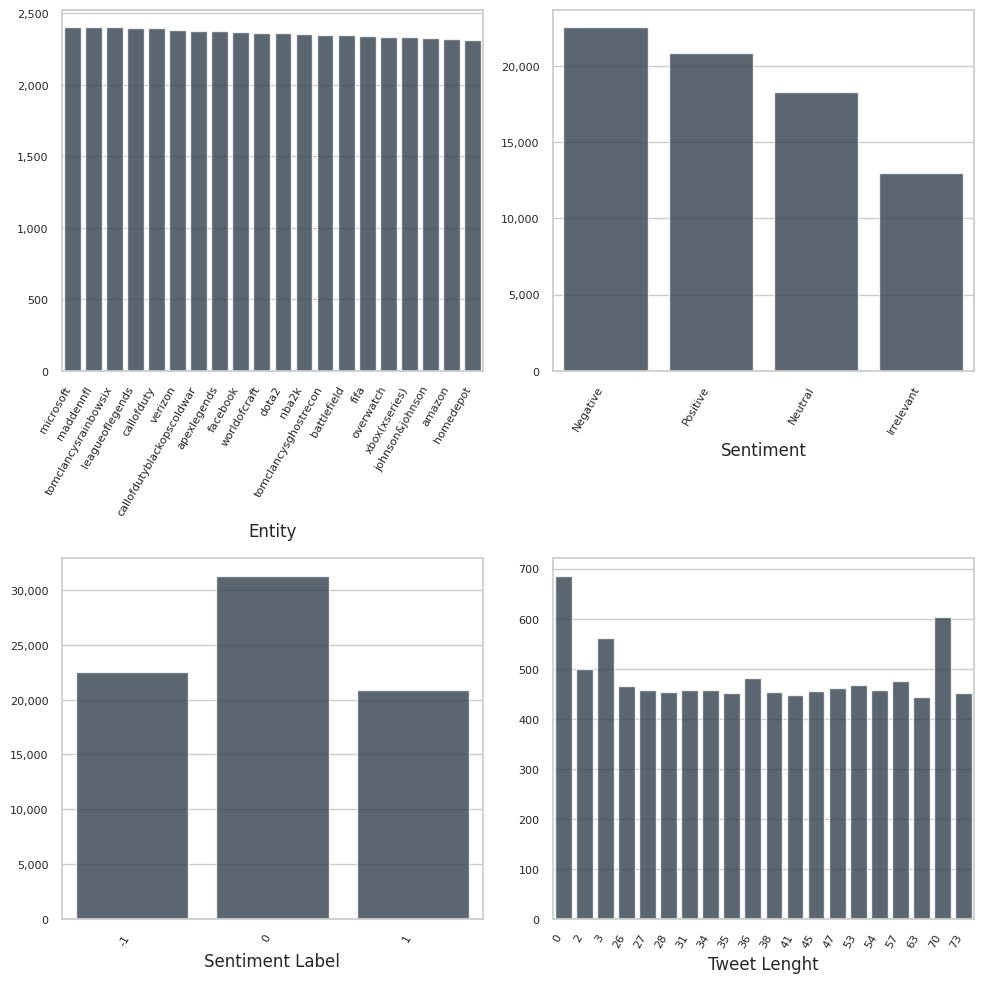

In [12]:
columnas_seleccionadas = ['Entity','Sentiment','Sentiment Label' , 'Tweet Lenght']

# Indicamos el tamaño de los gráficos
plt.figure(figsize=(10, 10))

# Corremos un ciclo for para ir graficando cada una de las variables
for i, column in enumerate(columnas_seleccionadas):
    plt.subplot(2, 2, i + 1)
    top_20 = dataset[column].value_counts().sort_values(ascending=False).head(20)
    sns.barplot(x=top_20.index, y=top_20.values, color='#2e4053', alpha=0.8)
    plt.xticks(rotation=60, ha="right", fontsize=8)
    plt.yticks(fontsize=8)
    current_axes = plt.gca()
    current_axes.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.tight_layout()
plt.show()

*Realizamos 4 gráficos de barras para visualizar la siguiente información:*
1.	*Top 20 de las entidades con mas tweets dirigidos.*
2.	*Disposición de los tweets según sentimiento (Negativo, Neutral, Irrelevante y Positivo).*
3.	*Disposición de los tweets la nueva etiqueta (-1, 0 y 1).*
4.	*Top 20 de las cantidades de caracteres que mas se repiten de los tweets.*

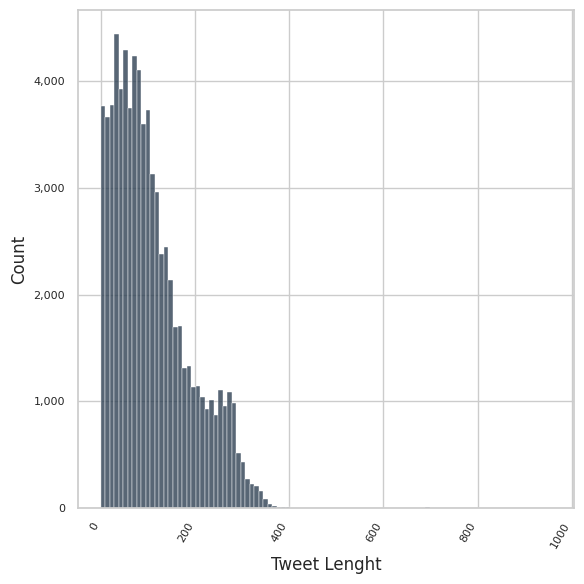

In [13]:
# Indicamos el tamaño de los gráficos
plt.figure(figsize=(6, 6))

# Gráficos el histograma del tamaño de los tweets
sns.histplot(dataset['Tweet Lenght'], bins=100, color='#2e4053', alpha=0.8)
plt.xticks(rotation=60, ha="right", fontsize=8)
plt.yticks(fontsize=8)
current_axes = plt.gca()
current_axes.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.tight_layout()
plt.show()


*Realizamos el histograma con la cantidad de caracteres de los tweets y poder identificar su distribucion.*


In [14]:
# Importar libreria
import nltk

# Descargar libreria
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [15]:
# Importar librerias
from nltk.corpus import stopwords
from collections import defaultdict, Counter
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [16]:
# Crear un conjunto de palabras vacíasen inglés.
stop=set(stopwords.words('english'))

*Filtrar palabras comunes que no aportan mucho significado al análisis de texto.*

In [17]:
# Inicializa una lista vacía para almacenar todas las palabras de los tweets.
corpus=[]
games= dataset['Tweet Content'].str.split()
games=games.values.tolist()

corpus=[word for i in games if isinstance(i, (list, tuple, str)) for word in i]

# Inicializa un diccionario 'dic' que cuenta la frecuencia de las stopwords.
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
df_dic = pd.DataFrame(list(dic.items()), columns=['Word', 'Frequency'])

# Inicializa un diccionario 'dic1' que cuenta la frecuencia de las palabras que no son stopwords.
dic1=defaultdict(int)
for word in corpus:
    if (word not in stop):
        dic1[word]+=1
df_dic1 = pd.DataFrame(list(dic1.items()), columns=['Word', 'Frequency'])

*Dividimos los tweets en palabras en una lista, para luego poder contar la frecuencia de las palabras que son stopwords y las que no lo son*

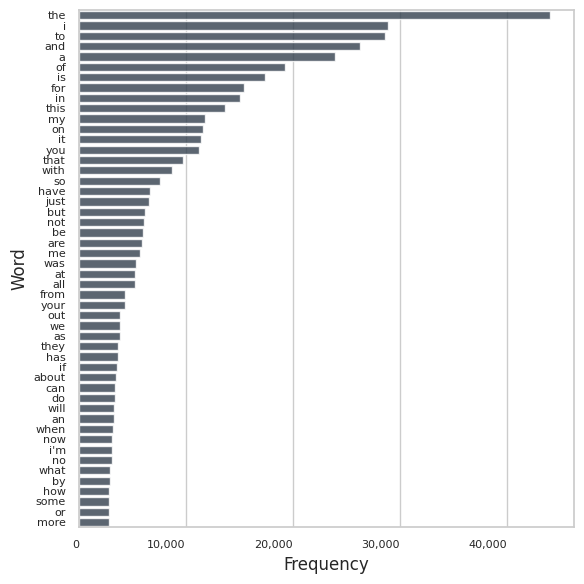

In [18]:
# Indicamos el tamaño de los gráficos
plt.figure(figsize=(6, 6))

# Gráficos el top50 de las stopwords
top_50=df_dic.sort_values(by='Frequency', ascending=False).head(50)
sns.barplot(y=top_50["Word"], x=top_50["Frequency"], color='#2e4053', alpha=0.8)
plt.xticks( ha="right", fontsize=8)
plt.yticks(fontsize=8)
current_axes = plt.gca()
current_axes.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y)))
plt.tight_layout()
plt.show()

*Gráficamos el top 50 de las stopwords que mas se repiten en los tweets*

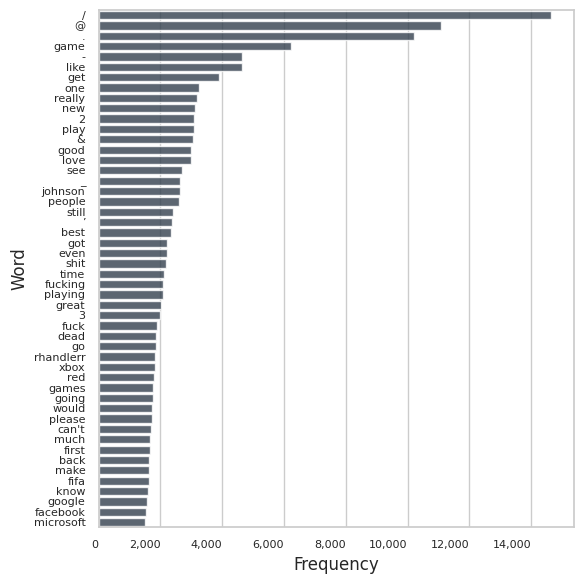

In [19]:
# Indicamos el tamaño de los gráficos
plt.figure(figsize=(6, 6))

# Gráficos el top50 de las no stopwords
top_50=df_dic1.sort_values(by='Frequency', ascending=False).head(50)
sns.barplot(y=top_50["Word"], x=top_50["Frequency"], color='#2e4053', alpha=0.8)
plt.xticks( ha="right", fontsize=8)
plt.yticks(fontsize=8)
current_axes = plt.gca()
current_axes.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y)))
plt.tight_layout()
plt.show()

*Gráficamos el top 50 de las NO stopwords que mas se repiten en los tweets*

In [20]:
# Genera un gráfico de barras horizontal que muestra los n-gramas más frecuentes en un texto.
def plot_top_ngrams_barchart(text, n=2):

    #Función interna para extraer los n-gramas más frecuentes de un corpus.
    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:50]

    #Indicamos el tamaño de los gráficos
    plt.figure(figsize=(6, 6))

    # Obtiene los 50 n-gramas más frecuentes del texto.
    top_n_bigrams=_get_top_ngram(corpus,n)[:50]

    # Crea el gráfico de barras horizontal.
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x, color='#2e4053', alpha=0.8)
    plt.xticks( ha="right", fontsize=8)
    plt.yticks(fontsize=8)
    current_axes = plt.gca()
    current_axes.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y)))
    plt.tight_layout()
    plt.show()

*Función para determinar los 50 N-grams más comunes y luego graficarlos*

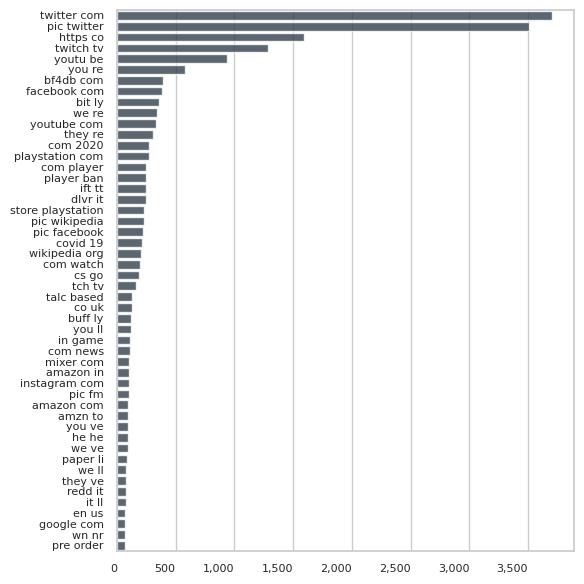

In [21]:
# Llama a la función para graficar los bigramas más frecuentes.
plot_top_ngrams_barchart(dataset['Tweet Content'],2)

*Gráficamos los 50 2-grams más comunes en los tweets*

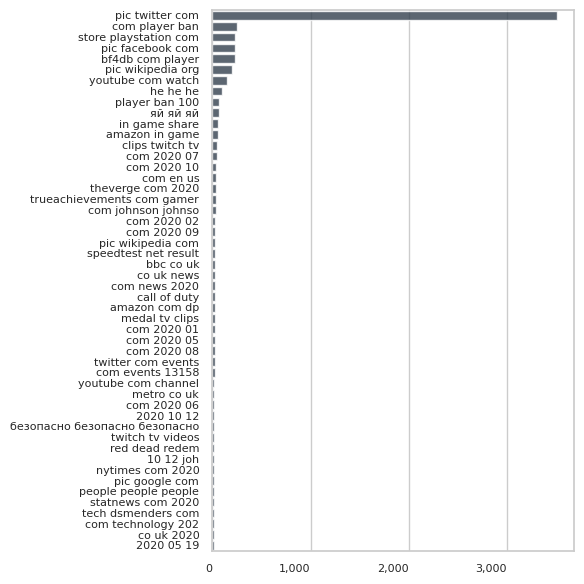

In [22]:
# Llama a la función para graficar los trigramas más frecuentes.
plot_top_ngrams_barchart(dataset['Tweet Content'],3)

*Gráficamos los 50 3-grams más comunes en los tweets*

In [23]:
# Genera y muestra una nube de palabras de los tweets.
def show_wordcloud(dataset, stop_words):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stop_words,
        max_words=100,
        max_font_size=40,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(dataset))

    # Crea el gráfico de nube de palabras
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

*Función para determinar los 100 palabras más comunes y luego graficarlas*

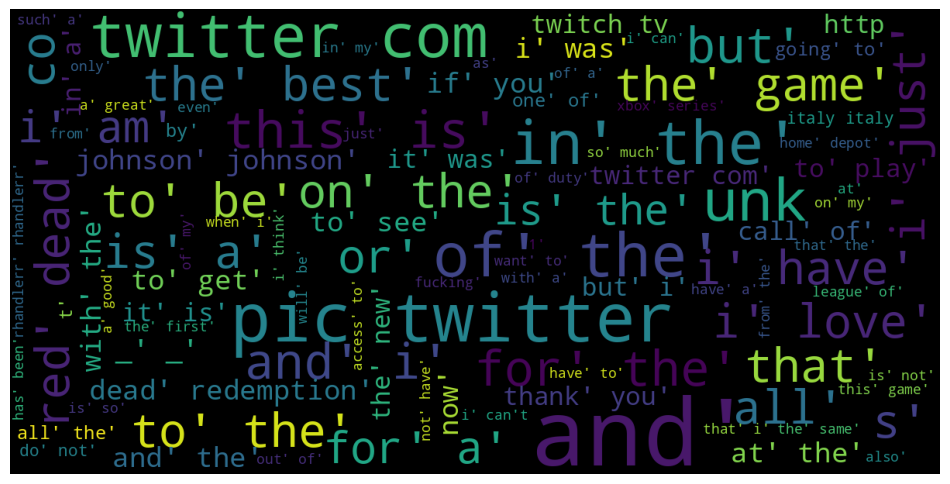

In [24]:
# Llama a la función para graficar el wordcloud.
show_wordcloud(corpus, stop)

*Se observan las palabras que más se repiten en los tweets en mayor tamaño para su detección*

In [25]:
# Instala librería
!pip install spacy

# Descarga el modelo de lenguaje 'en_core_web_sm' de spaCy.
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 40.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [26]:
# Importa la librería
import spacy

# Carga el modelo de lenguaje 'en_core_web_sm' de spaCy.
nlp = spacy.load("en_core_web_sm")

# Importa la función 'displacy' de spaCy, que se utiliza para visualizar
from spacy import displacy

In [27]:
# Análisis de dependencias y reconocimiento de entidades nombradas
for text in dataset["Tweet Content"].head(500):
    if isinstance(text, str):
        sentence_nlp = nlp(text)
        displacy.render(sentence_nlp, style='ent', jupyter=True)
    else:
        print(f"Skipping non-string value: {text}")

/usr/local/lib/python3.11/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


Skipping non-string value: nan


*Observamos en los tweets como se etiquetan de manera visual las diversas entidades nombradas detectadas por spaCy*

In [28]:
#Reconocimiento de entidades nombradas (NER) en un texto y devuelve una lista de etiquetas de entidades.
def ner(text):

    if isinstance(text, str):
        doc = nlp(text)
        return [X.label_ for X in doc.ents]
    else:
        return []

ent = dataset['Tweet Content'].apply(lambda x: ner(x))
ent = [x for sub in ent for x in sub]

from collections import Counter
counter = Counter(ent)
count = counter.most_common()

*Función para determinar las etiquetas de las entidades y realizar el conteo de estas*

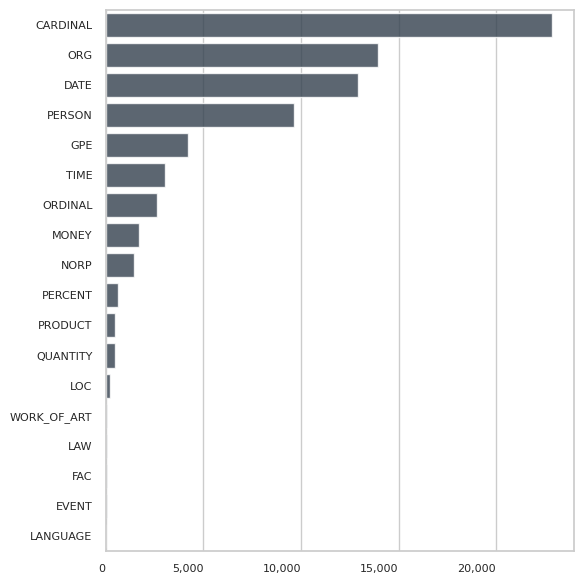

In [29]:
#Indicamos el tamaño de los gráficos
plt.figure(figsize=(6, 6))

# Crea el gráfico de barras horizontales
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x, color='#2e4053', alpha=0.8)
plt.xticks( ha="right", fontsize=8)
plt.yticks(fontsize=8)
current_axes = plt.gca()
current_axes.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y)))
plt.tight_layout()

*Se grafican las etiquetas de acuerdo a sus totales apra determionar la que esta más presente en los tweets*


In [30]:
#Función para extraer las palabras de la etiqueta Cardinal
def ner(text,ent="CARDINAL"):
    if isinstance(text, str):
        doc=nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]
    else:
        return []

gpe=dataset['Tweet Content'].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

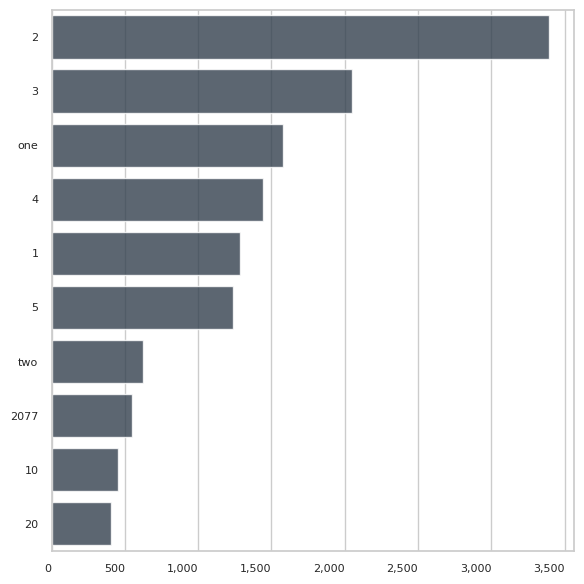

In [31]:
#Indicamos el tamaño de los gráficos
plt.figure(figsize=(6, 6))

# Crea el gráfico de barras horizontales
x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(x=y,y=x, color='#2e4053', alpha=0.8)
plt.xticks( ha="right", fontsize=8)
plt.yticks(fontsize=8)
current_axes = plt.gca()
current_axes.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y)))
plt.tight_layout()

*Se grafican el top 10 de palabras de la etiqueta CARDINAL presentes en los tweets*

In [32]:
#Función para extraer las palabras de la etiqueta ORG
def ner(text,ent="ORG"):
    if isinstance(text, str):
        doc=nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]
    else:
        return []

gpe=dataset['Tweet Content'].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

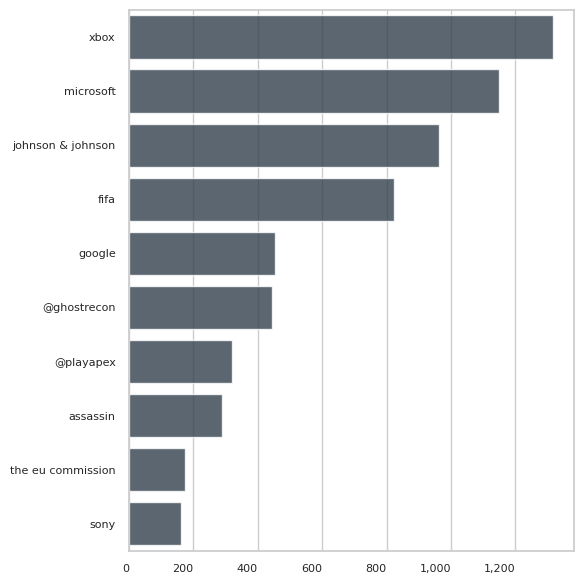

In [33]:
#Indicamos el tamaño de los gráficos
plt.figure(figsize=(6, 6))

# Crea el gráfico de barras horizontales
x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(x=y,y=x, color='#2e4053', alpha=0.8)
plt.xticks( ha="right", fontsize=8)
plt.yticks(fontsize=8)
current_axes = plt.gca()
current_axes.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y)))
plt.tight_layout()

*Se grafican el top 10 de palabras de la etiqueta ORG presentes en los tweets*

In [34]:
#Función para extraer las palabras de la etiqueta DATE
def ner(text,ent="DATE"):
    if isinstance(text, str):
        doc=nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]
    else:
        return []

gpe=dataset['Tweet Content'].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

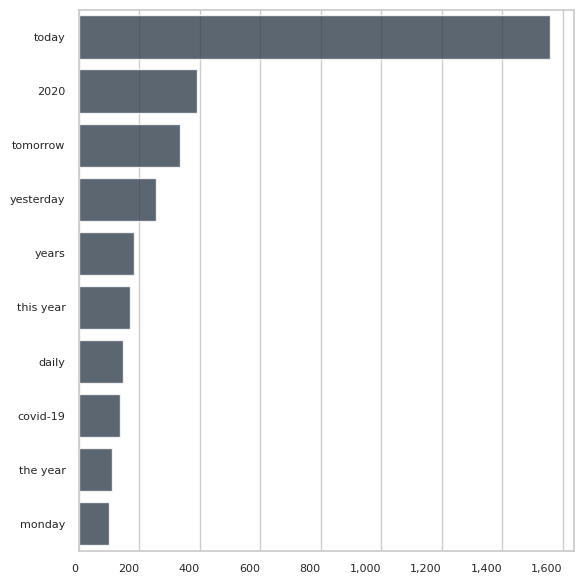

In [35]:
#Indicamos el tamaño de los gráficos
plt.figure(figsize=(6, 6))

# Crea el gráfico de barras horizontales
x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(x=y,y=x, color='#2e4053', alpha=0.8)
plt.xticks( ha="right", fontsize=8)
plt.yticks(fontsize=8)
current_axes = plt.gca()
current_axes.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y)))
plt.tight_layout()

*Se grafican el top 10 de palabras de la etiqueta DATE presentes en los tweets*

## **Preprocesamiento de datos**

In [36]:
# Seleccionando los caracteres no alfa numericos que no son espacios
special_chars = dataset['Tweet Content'].astype(str).apply(lambda x: [each for each in list(x) if not each.isalnum() and each != ' '])

# Obtener una lista de listas
flat_list = [item for sublist in special_chars for item in sublist]

# Caracteres especiales unicos
print(set(flat_list))

{'۔', '∇', '‘', '\U000e006e', '€', '🤦', '↑', '・', '🥂', ':', '🤣', '🤪', '"', '🧠', '⇒', '⁄', '_', '·', '⏳', '🦋', '🥄', '⏬', '¢', '(', '⇐', '≦', '^', '🦳', '\xa0', '&', '🥊', '※', '●', '🤥', '”', '🤔', '←', '🤠', '*', '🦊', '🥺', '„', '‖', '🤐', '：', '=', '+', '🟢', '‚', '→', '）', '🤺', '√', '©', '🦾', '（', '�', '¨', '🧘', '⌚', '🤙', '🥘', '\u2066', 'ั', '~', '\U000e007f', '™', '🤛', '🧀', '🤑', '🦀', '🪓', '\U000e0062', "'", '¶', '®', '`', '🤤', '%', '■', '°', '🤒', '🥳', '<', '🧙', '$', '🧜', '🤞', '-', '🤳', '\u200d', '⃣', '🥩', '🤗', '>', '•', '´', '🦌', '\u2063', '¯', '🤫', '🧹', 'ा', '}', '\u2060', '#', ',', '🤢', '…', '{', '🤬', '🥉', '🤓', '\u200b', '₹', '?', '†', '“', '。', '−', '🤩', '!', '£', '🥖', '🤟', ')', '🤧', '|', '≧', '🤝', '′', '🧡', '/', '🤸', '🤚', '🧢', '🧨', '«', '–', '\u2069', '‼', '，', '🥰', '¡', '🙂', '🤯', '—', '’', ';', '🥴', ']', '🧻', '\U000e0067', '§', '🧐', '★', '@', '\\', '🤍', '″', 'ู', '.', '»', '🥈', '🤖', '🤡', 'े', '🤕', '🤨', '🥵', '¿', '🥇', '🦁', '\U000e0065', '[', '🤮', '🦅', '🧝', '×', '±', '‡', '🤷'}


*Se genera una lista para observar todos los caracteres especiales que tienen los tweets*

In [37]:
# Importa el módulo regular expressions
import re

# Elimina los caracteres diferentes a letras y números
review_backup = dataset['Tweet Content'].copy()
dataset['Tweet Content Fix'] = dataset['Tweet Content'].astype(str).apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))
dataset['Tweet Content Fix']

,Tweet Content Fix
0,im getting on borderlands and i will murder yo...
1,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...
3,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...
...,...
74677,just realized that the windows partition of my...
74678,just realized that my mac window partition is ...
74679,just realized the windows partition of my mac ...
74680,just realized between the windows partition of...


*Se eliminan todos los caracteres diferentes a letras y números de los tweets*

In [38]:
# Importa la función word_tokenize
from nltk import word_tokenize

# Lista de los tokens de todos los tweets
token_lists = [word_tokenize(str(each)) for each in dataset['Tweet Content']]
tokens = [item for sublist in token_lists for item in sublist]
print("Numero de tokens unicos antes: ", len(set(tokens)))

# Lista de los tokens de todos los tweets eliminando los caracteres especiales
token_lists_fix = [word_tokenize(str(each)) for each in dataset['Tweet Content Fix']]
tokens_fix = [item for sublist in token_lists_fix for item in sublist]
print("Numero de tokens unicos nuevos: ", len(set(tokens_fix)))

Numero de tokens unicos antes:  41261
Numero de tokens unicos nuevos:  30436


*Se contabilizan los tokens para ver la diferencia entre los tweet en su forma origianl y sin los caracteres especiales*

In [39]:
# Calculamos la diferencia en porcentaje
difference = ((len(set(tokens))-len(set(tokens_fix)))/len(set(tokens))*100)
print(f"{difference:.2f} %")

26.24 %


*Se obtiene una reducción del 26%*

In [40]:
## Importa la clase 'PorterStemmer' de NLTK
from nltk.stem import PorterStemmer

In [41]:
def preprocess_text(text):
    # Tokeniza el texto, convirtiéndolo a minúsculas.
    tokens = word_tokenize(text.lower())

    # Elimina las stopwords (palabras comunes) del texto.
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Aplica stemming usando el algoritmo Porter.
    porter = PorterStemmer()
    porter_tokens = [porter.stem(token) for token in filtered_tokens]

    # Une los tokens procesados de nuevo en una cadena de texto.
    processed_text = ' '.join( porter_tokens)
    return processed_text

# Aplica la función al dataset
dataset["Tweet Content Fix"] = dataset["Tweet Content Fix"].apply(preprocess_text)
dataset

,Tweet ID,Entity,Sentiment,Tweet Content,Sentiment Label,Tweet Lenght,Tweet Content Fix
0,2401,borderlands,Positive,im getting on borderlands and i will murder yo...,1,53,im get borderland murder
1,2401,borderlands,Positive,i am coming to the borders and i will kill you...,1,51,come border kill
2,2401,borderlands,Positive,im getting on borderlands and i will kill you ...,1,50,im get borderland kill
3,2401,borderlands,Positive,im coming on borderlands and i will murder you...,1,51,im come borderland murder
4,2401,borderlands,Positive,im getting on borderlands 2 and i will murder ...,1,57,im get borderland 2 murder
...,...,...,...,...,...,...,...
74677,9200,nvidia,Positive,just realized that the windows partition of my...,1,128,realiz window partit mac like 6 year behind nv...
74678,9200,nvidia,Positive,just realized that my mac window partition is ...,1,117,realiz mac window partit 6 year behind nvidia ...
74679,9200,nvidia,Positive,just realized the windows partition of my mac ...,1,125,realiz window partit mac 6 year behind nvidia ...
74680,9200,nvidia,Positive,just realized between the windows partition of...,1,159,realiz window partit mac like 6 year behind nv...


*Procesamos todos los tweets con los siguientes procesos:*
1.   *Tokeniza el texto, convirtiéndolo a minúsculas.*
2.   *Elimina las stopwords.*
3.   *Aplica stemming usando el algoritmo Porter.*
4.   *Une los tokens procesados de nuevo en una cadena de texto.*  



## **Modelado**

### **Textblob**

In [42]:
# Importa la libreria TextBlob
from textblob import TextBlob

# Calcula la polaridad de un texto utilizando TextBlob
def polarity(text):
    return TextBlob(str(text)).sentiment.polarity

# Crea una nueva columna con el valor de polaridad obtenido
dataset['Polarity Score'] = dataset['Tweet Content Fix'].apply(lambda x: polarity(x))
dataset

,Tweet ID,Entity,Sentiment,Tweet Content,Sentiment Label,Tweet Lenght,Tweet Content Fix,Polarity Score
0,2401,borderlands,Positive,im getting on borderlands and i will murder yo...,1,53,im get borderland murder,0.0
1,2401,borderlands,Positive,i am coming to the borders and i will kill you...,1,51,come border kill,0.0
2,2401,borderlands,Positive,im getting on borderlands and i will kill you ...,1,50,im get borderland kill,0.0
3,2401,borderlands,Positive,im coming on borderlands and i will murder you...,1,51,im come borderland murder,0.0
4,2401,borderlands,Positive,im getting on borderlands 2 and i will murder ...,1,57,im get borderland 2 murder,0.0
...,...,...,...,...,...,...,...,...
74677,9200,nvidia,Positive,just realized that the windows partition of my...,1,128,realiz window partit mac like 6 year behind nv...,-0.4
74678,9200,nvidia,Positive,just realized that my mac window partition is ...,1,117,realiz mac window partit 6 year behind nvidia ...,-0.4
74679,9200,nvidia,Positive,just realized the windows partition of my mac ...,1,125,realiz window partit mac 6 year behind nvidia ...,-0.4
74680,9200,nvidia,Positive,just realized between the windows partition of...,1,159,realiz window partit mac like 6 year behind nv...,-0.4


*Generamos una nueva columna con los valores de polaridad de la función Textblob que nos permite analizar el sentimiento de cada uno de los tweets*

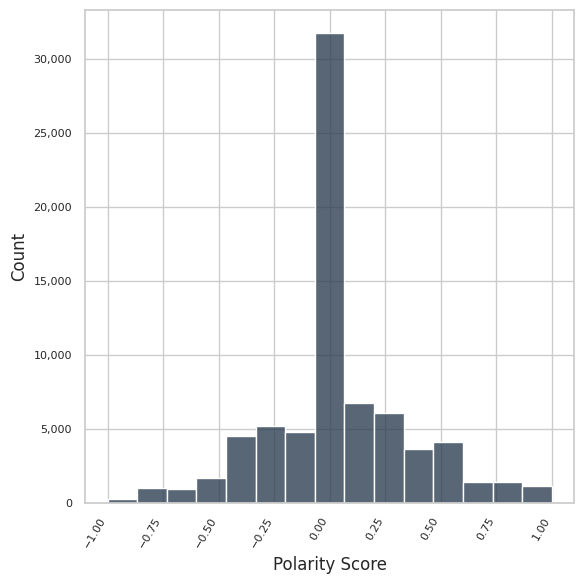

In [43]:
#Indicamos el tamaño de los gráficos
plt.figure(figsize=(6, 6))

# Crea el histograma de los valores de polaridad
sns.histplot(dataset['Polarity Score'], bins=15, color='#2e4053', alpha=0.8)
plt.xticks(rotation=60, ha="right", fontsize=8)
plt.yticks(fontsize=8)
current_axes = plt.gca()
current_axes.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.tight_layout()
plt.show()

*Nos permite visualizar la distribución de los valores de polaridad*

In [44]:
# Función que transforma los valores de polaridad en las etiquetas de sentimiento
def sentiment(x):
    if x < 0:
        return -1
    elif x > 0:
        return 1
    else:
        return 0

dataset['Polarity'] = dataset['Polarity Score'].map(lambda x: sentiment(x))

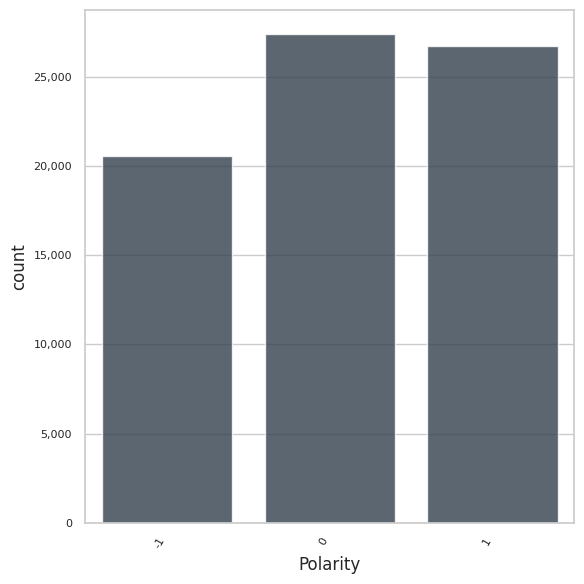

In [45]:
#Indicamos el tamaño de los gráficos
plt.figure(figsize=(6, 6))

# Grafica la cantidad de tweets segun su etiqueta de sentimiento
sns.barplot(x=dataset.Polarity.value_counts().index, y=dataset.Polarity.value_counts(), color='#2e4053', alpha=0.8)
plt.xticks(rotation=60, ha="right", fontsize=8)
plt.yticks(fontsize=8)
current_axes = plt.gca()
current_axes.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.tight_layout()
plt.show()

In [46]:
# Importa la función 'confusion_matrix' de scikit-learn.
from sklearn.metrics import confusion_matrix

# Importa la función 'classification_report' de scikit-learn.
from sklearn.metrics import classification_report

In [47]:
# Imprime la matriz de confusión
print(confusion_matrix(dataset["Sentiment Label"], dataset["Polarity"]))

[[ 9512  8128  4902]
 [ 7410 12192 11706]
 [ 3651  7055 10126]]


In [48]:
# Imprime un informe de clasificación con las métricas de rendimiento del modelo
print(classification_report(dataset["Sentiment Label"], dataset["Polarity"]))

              precision    recall  f1-score   support

          -1       0.46      0.42      0.44     22542
           0       0.45      0.39      0.42     31308
           1       0.38      0.49      0.43     20832

    accuracy                           0.43     74682
   macro avg       0.43      0.43      0.43     74682
weighted avg       0.43      0.43      0.43     74682



*Podemos observar que los valores de precisión general del modelo son inferiores al 43%, teniendo dificultades para la predicción de tweets positivos (1) teniendo un probabilidad de acierto de solo el 38%, todo esto nos indica un rendimiento probre en este modelo*

### **Sentiment Vader**

In [49]:
# Importa la libreria 'SentimentIntensityAnalyzer' de NLTK.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [50]:
# Crea una instancia del analizador de sentimiento VADER.
sid = SentimentIntensityAnalyzer()

# Calcula la polaridad de un texto utilizando VADER
def get_vader_compound(sent):
    if not isinstance(sent, str):
        sent = str(sent)
    ss = sid.polarity_scores(sent)
    return ss['compound']

# Crea una nueva columna con el valor de polaridad obtenido
dataset['Polarity Vader Score'] = dataset['Tweet Content Fix'].apply(lambda x: get_vader_compound(x))
dataset

,Tweet ID,Entity,Sentiment,Tweet Content,Sentiment Label,Tweet Lenght,Tweet Content Fix,Polarity Score,Polarity,Polarity Vader Score
0,2401,borderlands,Positive,im getting on borderlands and i will murder yo...,1,53,im get borderland murder,0.0,0,-0.6908
1,2401,borderlands,Positive,i am coming to the borders and i will kill you...,1,51,come border kill,0.0,0,-0.6908
2,2401,borderlands,Positive,im getting on borderlands and i will kill you ...,1,50,im get borderland kill,0.0,0,-0.6908
3,2401,borderlands,Positive,im coming on borderlands and i will murder you...,1,51,im come borderland murder,0.0,0,-0.6908
4,2401,borderlands,Positive,im getting on borderlands 2 and i will murder ...,1,57,im get borderland 2 murder,0.0,0,-0.6908
...,...,...,...,...,...,...,...,...,...,...
74677,9200,nvidia,Positive,just realized that the windows partition of my...,1,128,realiz window partit mac like 6 year behind nv...,-0.4,-1,0.3612
74678,9200,nvidia,Positive,just realized that my mac window partition is ...,1,117,realiz mac window partit 6 year behind nvidia ...,-0.4,-1,0.0000
74679,9200,nvidia,Positive,just realized the windows partition of my mac ...,1,125,realiz window partit mac 6 year behind nvidia ...,-0.4,-1,0.0000
74680,9200,nvidia,Positive,just realized between the windows partition of...,1,159,realiz window partit mac like 6 year behind nv...,-0.4,-1,-0.2500


*Generamos una nueva columna con los valores de polaridad de la función Sentiment Vader que nos permite analizar el sentimiento de cada uno de los tweets*

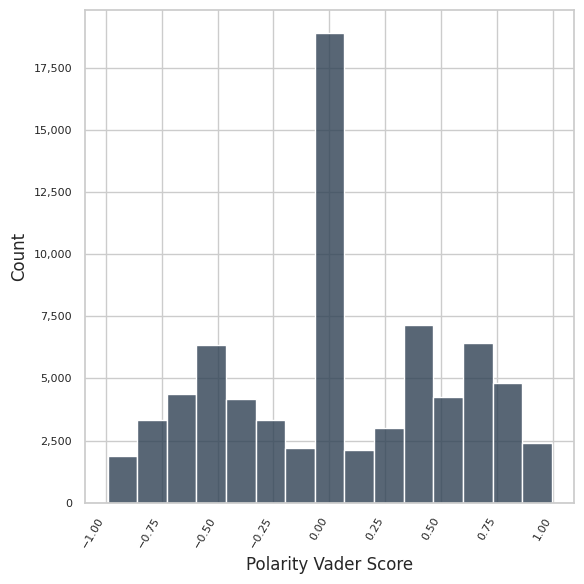

In [51]:
#Indicamos el tamaño de los gráficos
plt.figure(figsize=(6, 6))

# Crea el histograma de los valores de polaridad
sns.histplot(dataset['Polarity Vader Score'], bins=15, color='#2e4053', alpha=0.8)
plt.xticks(rotation=60, ha="right", fontsize=8)
plt.yticks(fontsize=8)
current_axes = plt.gca()
current_axes.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.tight_layout()
plt.show()

*Nos permite visualizar la distribución de los valores de polaridad*

In [52]:
# Función que transforma los valores de polaridad en las etiquetas de sentimiento
def sentiment(x):
    if x < 0:
        return -1
    elif x > 0:
        return 1
    else:
        return 0

dataset['Polarity Vader'] = dataset['Polarity Vader Score'].\
    map(lambda x: sentiment(x))

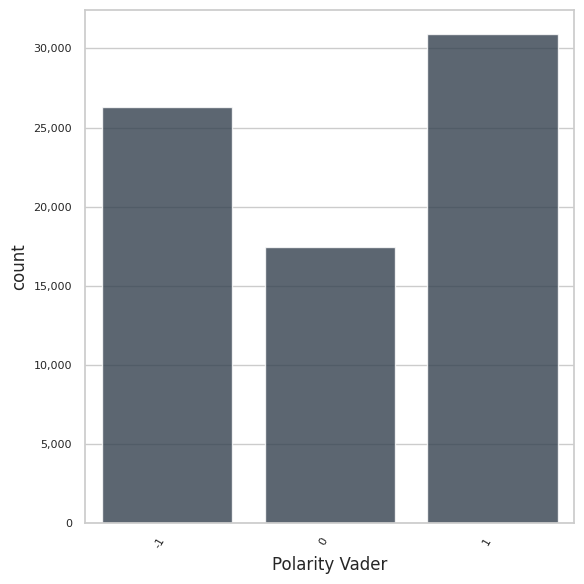

In [53]:
#Indicamos el tamaño de los gráficos
plt.figure(figsize=(6, 6))

# Grafica la cantidad de tweets segun su etiqueta de sentimiento
sns.barplot(x=dataset['Polarity Vader'].value_counts().index, y=dataset['Polarity Vader'].value_counts(), color='#2e4053', alpha=0.8)
plt.xticks(rotation=60, ha="right", fontsize=8)
plt.yticks(fontsize=8)
current_axes = plt.gca()
current_axes.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.tight_layout()
plt.show()

In [54]:
# Imprime la matriz de confusión
print(confusion_matrix(dataset["Sentiment Label"], dataset["Polarity Vader"]))

[[12017  4867  5658]
 [10392  7727 13189]
 [ 3919  4870 12043]]


In [55]:
# Imprime un informe de clasificación con las métricas de rendimiento del modelo
print(classification_report(dataset["Sentiment Label"], dataset["Polarity Vader"]))

              precision    recall  f1-score   support

          -1       0.46      0.53      0.49     22542
           0       0.44      0.25      0.32     31308
           1       0.39      0.58      0.47     20832

    accuracy                           0.43     74682
   macro avg       0.43      0.45      0.42     74682
weighted avg       0.43      0.43      0.41     74682



*Podemos observar que los valores de precisión general del modelo son inferiores al 43%, teniendo dificultades para la predicción de tweets positivos (1) teniendo un probabilidad de acierto de solo el 39%, todo esto nos indica un rendimiento probre en este modelo*

### **Mejoramiento del Dataset para evaluar los modelos**

In [56]:
# Creamos una copia resumida del dataset con solo las variables "Sentiment Label" y"Tweet Content Fix"
data = dataset[["Sentiment Label", "Tweet Content Fix"]].copy()
data

,Sentiment Label,Tweet Content Fix
0,1,im get borderland murder
1,1,come border kill
2,1,im get borderland kill
3,1,im come borderland murder
4,1,im get borderland 2 murder
...,...,...
74677,1,realiz window partit mac like 6 year behind nv...
74678,1,realiz mac window partit 6 year behind nvidia ...
74679,1,realiz window partit mac 6 year behind nvidia ...
74680,1,realiz window partit mac like 6 year behind nv...


In [57]:
# Eliminamos los registros que el Sentiment Label es Neutral (0)
data = data[data['Sentiment Label'] != 0]
data['Sentiment Label'].unique()

array([ 1, -1])

In [58]:
# Reemplaza el valor -1 (que representa sentimiento negativo) por 0 en la columna 'Sentiment Label'.
data.loc[:, 'Sentiment Label'] = data['Sentiment Label'].replace(-1, 0)
print(data['Sentiment Label'].unique())

[1 0]


*Transformamos la variable 'Sentiment Label' a binaria para solo predecir los tweet positivos y negativos y ver como esto afecta el comportamiento de nuestro modelo*

### **Textblob Mejorado**

In [61]:
# Calcula la polaridad de un texto utilizando TextBlob
def polarity(text):
    return TextBlob(str(text)).sentiment.polarity

# Crea una nueva columna con el valor de polaridad obtenido
data.loc[:, 'Polarity Score'] = data['Tweet Content Fix'].apply(lambda x: polarity(x))
data

,Sentiment Label,Tweet Content Fix,Polarity Score
0,1,im get borderland murder,0.0
1,1,come border kill,0.0
2,1,im get borderland kill,0.0
3,1,im come borderland murder,0.0
4,1,im get borderland 2 murder,0.0
...,...,...,...
74677,1,realiz window partit mac like 6 year behind nv...,-0.4
74678,1,realiz mac window partit 6 year behind nvidia ...,-0.4
74679,1,realiz window partit mac 6 year behind nvidia ...,-0.4
74680,1,realiz window partit mac like 6 year behind nv...,-0.4


*Generamos una nueva columna con los valores de polaridad de la función Textblob que nos permite analizar el sentimiento de cada uno de los tweets*

In [65]:
# Función que transforma los valores de polaridad en las etiquetas de sentimiento
def sentiment(x):
    if x < 0:
        return 0
    else:
        return 1

data.loc[:, 'Polarity'] = data['Polarity Score'].map(lambda x: sentiment(x))

In [66]:
# Imprime la matriz de confusión
print(confusion_matrix(data["Sentiment Label"], data["Polarity"]))

[[ 9512 13030]
 [ 3651 17181]]


In [67]:
# Imprime un informe de clasificación con las métricas de rendimiento del modelo
print(classification_report(data["Sentiment Label"], data["Polarity"]))

              precision    recall  f1-score   support

           0       0.72      0.42      0.53     22542
           1       0.57      0.82      0.67     20832

    accuracy                           0.62     43374
   macro avg       0.65      0.62      0.60     43374
weighted avg       0.65      0.62      0.60     43374



*Podemos observar que los valores de precisión general del modelo son inferiores al 62% limitando los tweets a positivos y negativos, teniendo dificultades para la predicción de tweets positivos (1) con un probabilidad de acierto de solo el 57%, todo esto nos indica un rendimiento moderado en este modelo*

### **Sentiment Vader Mejorado**

In [68]:
# Crea una instancia del analizador de sentimiento VADER.
sid = SentimentIntensityAnalyzer()

# Calcula la polaridad de un texto utilizando VADER
def get_vader_compound(sent):
    if not isinstance(sent, str):
        sent = str(sent)
    ss = sid.polarity_scores(sent)
    return ss['compound']

# Crea una nueva columna con el valor de polaridad obtenido
data = data.copy()
data.loc[:, 'Polarity Vader Score'] = data['Tweet Content Fix'].apply(lambda x: get_vader_compound(x))
data

,Sentiment Label,Tweet Content Fix,Polarity Score,Polarity,Polarity Vader Score
0,1,im get borderland murder,0.0,1,-0.6908
1,1,come border kill,0.0,1,-0.6908
2,1,im get borderland kill,0.0,1,-0.6908
3,1,im come borderland murder,0.0,1,-0.6908
4,1,im get borderland 2 murder,0.0,1,-0.6908
...,...,...,...,...,...
74677,1,realiz window partit mac like 6 year behind nv...,-0.4,0,0.3612
74678,1,realiz mac window partit 6 year behind nvidia ...,-0.4,0,0.0000
74679,1,realiz window partit mac 6 year behind nvidia ...,-0.4,0,0.0000
74680,1,realiz window partit mac like 6 year behind nv...,-0.4,0,-0.2500


*Generamos una nueva columna con los valores de polaridad de la función Sentiment Vader que nos permite analizar el sentimiento de cada uno de los tweets*

In [69]:
# Función que transforma los valores de polaridad en las etiquetas de sentimiento
def sentiment(x):
    if x < 0:
        return 0
    else:
        return 1

data = data.copy()
data.loc[:, 'Polarity Vader'] = data['Polarity Vader Score'].map(lambda x: sentiment(x))

In [70]:
# Imprime la matriz de confusión
print(confusion_matrix(data["Sentiment Label"], data["Polarity Vader"]))

[[12017 10525]
 [ 3919 16913]]


In [71]:
# Imprime un informe de clasificación con las métricas de rendimiento del modelo
print(classification_report(data["Sentiment Label"], data["Polarity Vader"]))

              precision    recall  f1-score   support

           0       0.75      0.53      0.62     22542
           1       0.62      0.81      0.70     20832

    accuracy                           0.67     43374
   macro avg       0.69      0.67      0.66     43374
weighted avg       0.69      0.67      0.66     43374



*Podemos observar que los valores de precisión general del modelo son del 67%, todo esto nos indica un rendimiento moderado en este modelo*

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **Redes Neurales**

In [72]:
# Instala la biblioteca TensorFlow
!pip install tensorflow

In [73]:
# Importa la biblioteca TensorFlow.
import tensorflow as tf

# Importa la libreria Tokenizer del módulo tensorflow.keras.preprocessing.text
from tensorflow.keras.preprocessing.text import Tokenizer

# Importa la función pad_sequences del módulo tensorflow.keras.preprocessing.sequence.
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Importa la función train_test_split del módulo sklearn.model_selection.
from sklearn.model_selection import train_test_split

# Importa el modulo keras de la libreria TensorFlow.
from tensorflow import keras

In [74]:
# Preprocesar datos
tweets = data["Tweet Content Fix"].values
labels = data['Sentiment Label'].values

# Dividir en conjuntos de entrenamiento y prueba
tweets_train, tweets_test, labels_train, labels_test = train_test_split(tweets, labels, test_size=0.2, random_state=42)

In [75]:
# Tokenización
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(tweets_train)

# Secuenciamiento
sequences_train = tokenizer.texts_to_sequences(tweets_train)
sequences_test = tokenizer.texts_to_sequences(tweets_test)

# Relleno de secuencias
padded_train = pad_sequences(sequences_train, maxlen=100, truncating='post', padding='post')
padded_test = pad_sequences(sequences_test, maxlen=100, truncating='post', padding='post')

In [76]:
# Construcción del modelo
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=100),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilación del modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Resumen del modelo
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [77]:
# Entrenamiento del modelo
history = model.fit(padded_train, labels_train, epochs=10, validation_data=(padded_test, labels_test))

Epoch 1/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 51s 44ms/step - accuracy: 0.5097 - loss: 0.6931 - val_accuracy: 0.5276 - val_loss: 0.6920
Epoch 2/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.5199 - loss: 0.6925 - val_accuracy: 0.5276 - val_loss: 0.6919
Epoch 3/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.5145 - loss: 0.6928 - val_accuracy: 0.5276 - val_loss: 0.6917
Epoch 4/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.5162 - loss: 0.6927 - val_accuracy: 0.5276 - val_loss: 0.6920
Epoch 5/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.5190 - loss: 0.6925 - val_accuracy: 0.5276 - val_loss: 0.6920
Epoch 6/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.5202 - loss: 0.6924 - val_accuracy: 0.5276 - val_loss: 0.6920
Epoch 7/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.5209 - loss: 0.6924 - val_accuracy: 0.5276 - val_loss: 0.6922
Epoch 8/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.5159 -

In [78]:
# Evaluación del modelo
loss, accuracy = model.evaluate(padded_test, labels_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

272/272 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5233 - loss: 0.6923
Loss: 0.6921584606170654, Accuracy: 0.5276080965995789


*El modelo tiene un rendimiento bajo. La pérdida es relativamente alta y la precisión es solo ligeramente mejor que una predicción aleatoria.*

In [79]:
# Predicciones
predictions = model.predict(padded_test)
predictions = np.round(predictions).flatten()

272/272 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


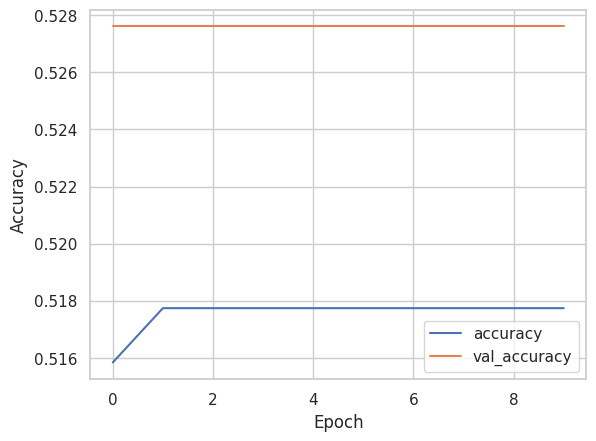

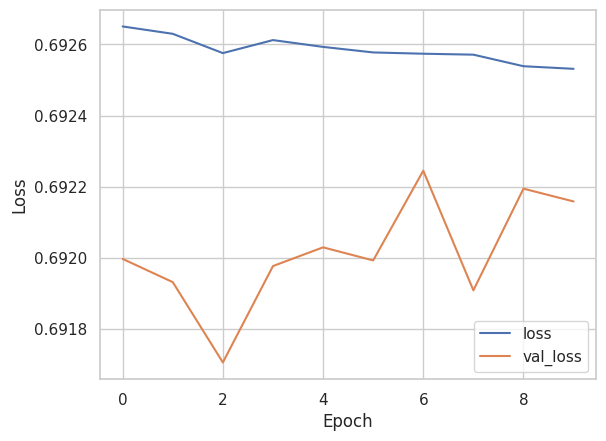

In [80]:
import matplotlib.pyplot as plt

# Visualización de precisión
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualización de pérdida
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Redes Neurales Mejorada**

In [81]:
# Preprocesar
tweets = data["Tweet Content Fix"].values
labels = data['Sentiment Label'].values

# Carga y preprocesamiento mejorado de los datos:
def limpiar_tweet(tweet):
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)  # Eliminar URLs
    tweet = re.sub(r'@\w+|#\w+', '', tweet)  # Eliminar menciones y hashtags
    tweet = re.sub(r'[^\w\s]', '', tweet)  # Eliminar puntuación
    tweet = tweet.lower()  # Convertir a minúsculas
    stop_words = set(stopwords.words('english'))
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])  # Eliminar stopwords
    lemmatizer = WordNetLemmatizer()
    tweet = ' '.join([lemmatizer.lemmatize(word) for word in tweet.split()]) #Lematización
    return tweet

# Dividir en conjuntos de entrenamiento y prueba
tweets_train, tweets_test, labels_train, labels_test = train_test_split(tweets, labels, test_size=0.2, random_state=42)

In [82]:
# Tokenización
tokenizer = Tokenizer(num_words=20000, oov_token='<OOV>')
tokenizer.fit_on_texts(tweets_train)

# Secuenciamiento
sequences_train = tokenizer.texts_to_sequences(tweets_train)
sequences_test = tokenizer.texts_to_sequences(tweets_test)

# Relleno de secuencias
padded_train = pad_sequences(sequences_train, maxlen=100, truncating='post', padding='post')
padded_test = pad_sequences(sequences_test, maxlen=120, truncating='post', padding='post')

In [83]:
# Construcción del modelo mejorado:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 32, input_length=120),  # Aumentamos la dimensión del embedding
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)), # LSTM bidireccional
    tf.keras.layers.GlobalMaxPooling1D(), # Max pooling
    tf.keras.layers.Dense(64, activation='relu'), # Aumentamos las unidades de la capa densa
    tf.keras.layers.Dropout(0.5), # Dropout para regularización
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilación del modelo
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [84]:
# Entrenamiento del modelo mejorado:
history = model.fit(padded_train, labels_train, epochs=15, validation_data=(padded_test, labels_test), batch_size=64)

Epoch 1/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 82s 142ms/step - accuracy: 0.6526 - loss: 0.5935 - val_accuracy: 0.8754 - val_loss: 0.2931
Epoch 2/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 79s 145ms/step - accuracy: 0.9006 - loss: 0.2429 - val_accuracy: 0.9087 - val_loss: 0.2235
Epoch 3/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 82s 144ms/step - accuracy: 0.9366 - loss: 0.1561 - val_accuracy: 0.9202 - val_loss: 0.1922
Epoch 4/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 77s 142ms/step - accuracy: 0.9476 - loss: 0.1257 - val_accuracy: 0.9183 - val_loss: 0.2060
Epoch 5/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 79s 136ms/step - accuracy: 0.9527 - loss: 0.1070 - val_accuracy: 0.9228 - val_loss: 0.2017
Epoch 6/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 85s 142ms/step - accuracy: 0.9580 - loss: 0.0998 - val_accuracy: 0.9277 - val_loss: 0.2019
Epoch 7/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 77s 142ms/step - accuracy: 0.9615 - loss: 0.0876 - val_accuracy: 0.9268 - val_loss: 0.2085
Epoch 8/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 84s 145ms/step - accuracy: 0.9608 - loss: 0

In [85]:
# Evaluación del modelo
loss, accuracy = model.evaluate(padded_test, labels_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

272/272 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9253 - loss: 0.2888
Loss: 0.26673799753189087, Accuracy: 0.9294524788856506


*El modelo tiene un buen rendimiento general, con una precisión de aproximada del 93%. La pérdida es relativamente baja 25%, lo que indica que el modelo está haciendo un buen trabajo al minimizar el error en sus predicciones.En general, estos resultados sugieren que el modelo es adecuado para la tarea para la que fue entrenado.*

In [86]:
# Predicciones
predictions = model.predict(padded_test)
predictions = np.round(predictions).flatten()

272/272 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step


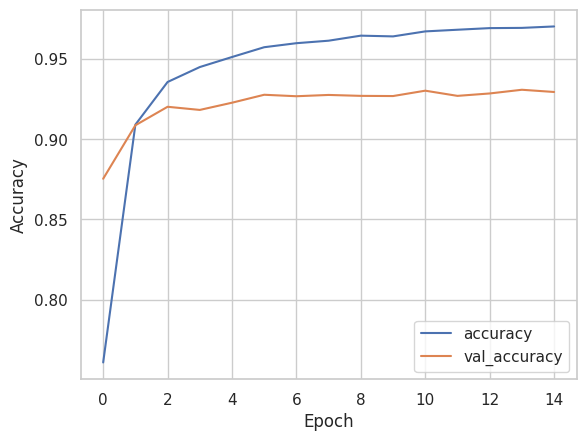

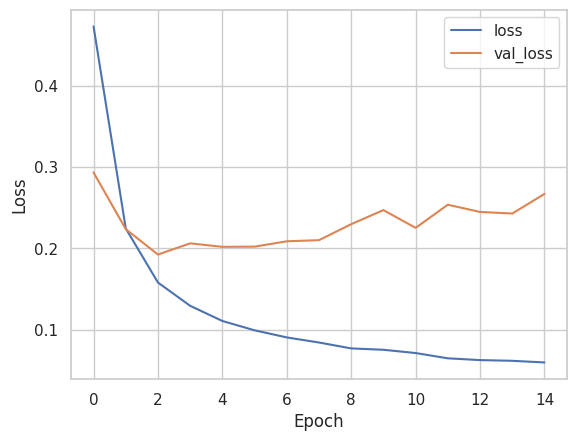

In [87]:
import matplotlib.pyplot as plt

# Visualización de precisión
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualización de pérdida
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Conclusiones Generales:**



### **Desempeño de modelos básicos:**


Los modelos de análisis de sentimiento basados en léxico, como TextBlob y VADER, mostraron limitaciones significativas en este conjunto de datos. Su incapacidad para capturar matices contextuales y expresiones complejas resultó en un rendimiento pobre.

### **Red Neuronal Simple:**

La red neuronal simple demostró una mejora con respecto a los modelos basados en léxico, lo que indica la importancia de aprender representaciones de datos. Sin embargo, su capacidad limitada para modelar relaciones complejas resultó en un rendimiento moderado.

### **Red Neuronal Multicapa:**

La red neuronal multicapa logró un rendimiento sobresaliente, con una precisión del 93% y pérdidas del 25%. Este resultado subraya la capacidad de las redes neuronales profundas para modelar patrones complejos en datos de texto y realizar análisis de sentimiento precisos.

### **Implicaciones:**

Este estudio demuestra la importancia de seleccionar modelos apropiados para tareas de análisis de sentimiento. Las redes neuronales profundas, en particular las arquitecturas multicapa, pueden lograr una precisión significativamente mayor en comparación con los modelos tradicionales.
Es posible que las librerias TextBlob y Vader, necesiten de un trabajo mas profundo de limpieza y preprocesamiento de la data para que sea efectiva.

### **Direcciones Futuras:**

Las investigaciones futuras podrían explorar el uso de arquitecturas de redes neuronales más avanzadas, como los transformadores, para mejorar aún más la precisión del análisis de sentimiento.

También se podria explorar la idea de utilizar modelos pre entrenados y realizar un fine tuning con la data propia, para intentar mejorar los resultados.

La recopilación de conjuntos de datos más grandes y diversos podría ayudar a mejorar la generalización de los modelos.